In [12]:
import torch
import sys
from torch import nn

from model import LipNet
from utils import *

In [13]:
!ls

aagfhgtpmv.mp4	 features.ipynb  main.ipynb  pretrain	     utils.py
cvtransforms.py  features.py	 model.py    __pycache__
dataset.py	 ffmpegtest.py	 options.py  Untitled.ipynb


In [23]:
opt = __import__('options')

device = f'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

model = LipNet()
model = model.to(device)
net = nn.DataParallel(model).to(device)

if(hasattr(opt, 'weights')):
    pretrained_dict = torch.load(
        opt.weights, map_location=torch.device(device))
    model_dict = model.state_dict()
    pretrained_dict = {k: v for k, v in pretrained_dict.items(
    ) if k in model_dict.keys() and v.size() == model_dict[k].size()}
    missed_params = [k for k, v in model_dict.items(
    ) if not k in pretrained_dict.keys()]
    print(
        'loaded params/tot params:{}/{}'.format(len(pretrained_dict), len(model_dict)))
    print('miss matched params:{}'.format(missed_params))
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)

video, points = load_video('aagfhgtpmv.mp4', device=device)
print('video read, feeding to the model...')
y, yf = model(video[None, ...].to(device))

print(y.shape, yf.shape)

cuda
loaded params/tot params:24/24
miss matched params:[]
Video is read. Number of frames: 300
Face Aligment Network Loaded
Landmarks Detected
video read, feeding to the model...
torch.Size([1, 300, 28]) torch.Size([300, 1, 512])


In [25]:
p1 = np.stack([point[0] for point in points])
p1

array([[[318., 315.],
        [326., 350.],
        [339., 380.],
        ...,
        [512., 389.],
        [499., 393.],
        [490., 393.]],

       [[318., 315.],
        [326., 349.],
        [339., 380.],
        ...,
        [512., 388.],
        [499., 393.],
        [491., 393.]],

       [[317., 315.],
        [325., 349.],
        [338., 379.],
        ...,
        [506., 392.],
        [497., 392.],
        [489., 392.]],

       ...,

       [[540., 299.],
        [548., 331.],
        [556., 360.],
        ...,
        [686., 388.],
        [674., 392.],
        [661., 392.]],

       [[554., 304.],
        [558., 333.],
        [570., 362.],
        ...,
        [705., 390.],
        [692., 394.],
        [676., 394.]],

       [[564., 304.],
        [572., 336.],
        [580., 365.],
        ...,
        [717., 389.],
        [701., 393.],
        [689., 393.]]], dtype=float32)

In [18]:
video, points2 = load_video('aagfhgtpmv.mp4', device=device, div=2)


Video is read. Number of frames: 300
Face Aligment Network Loaded
Landmarks Detected


In [26]:
p2 = np.stack([point[0] for point in points2])
p2

array([[[312., 318.],
        [324., 348.],
        [338., 378.],
        ...,
        [514., 388.],
        [500., 392.],
        [492., 392.]],

       [[312., 318.],
        [324., 348.],
        [338., 378.],
        ...,
        [514., 388.],
        [500., 392.],
        [492., 392.]],

       [[314., 314.],
        [328., 350.],
        [336., 380.],
        ...,
        [508., 390.],
        [498., 394.],
        [490., 394.]],

       ...,

       [[540., 302.],
        [548., 332.],
        [556., 360.],
        ...,
        [690., 390.],
        [676., 394.],
        [664., 394.]],

       [[550., 300.],
        [558., 330.],
        [566., 360.],
        ...,
        [702., 390.],
        [690., 394.],
        [678., 394.]],

       [[564., 304.],
        [572., 336.],
        [580., 366.],
        ...,
        [718., 390.],
        [706., 394.],
        [688., 394.]]], dtype=float32)

In [27]:
p1.shape, p2.shape

((300, 68, 2), (300, 68, 2))

In [32]:
np.sqrt(((p1 - p2) ** 2).mean())

2.117481

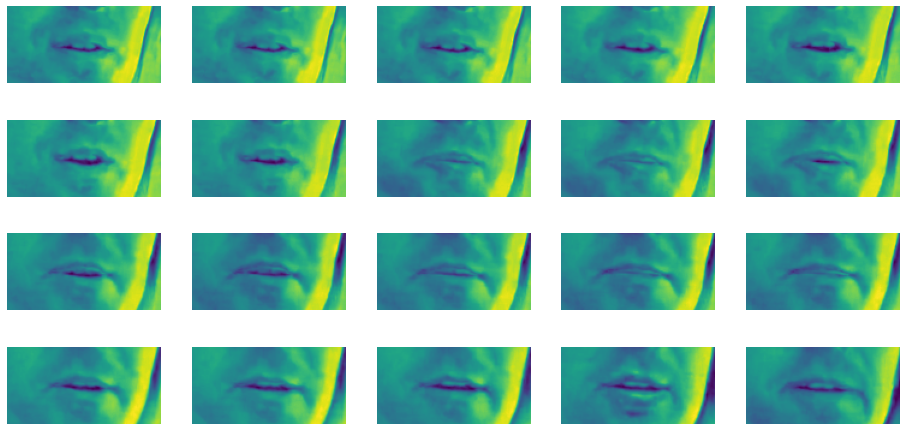

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(video[0,i])
    plt.axis('off')
    